In the field of statistics, the assumption of normality is important because many statistical techniques perform calculations assuming that the data is normally distributed. The techniques that assume Gaussian or Gaussian-like distribution are listed below:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Techniques That Assume Normality</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Hypothesis testing through t-test and z-test</td>
      </tr>
      <tr>
         <td class="text-center">Analysis of variance (ANOVA)</td>
      </tr>       
      <tr>
         <td class="text-center">Sequential Gaussian simulation in spatial analysis</td>
      </tr>
      <tr>
         <td class="text-center">Control limits in control chart</td>
      </tr>
   </tbody>
</table>

Unfortunately, many real-life data are not normal. Permeability distribution of rock samples is lognormal. Time required to repair a malfunctioning component follows exponential distribution, and reliability analysis for machine performance with respect to time follows Weibull distribution. What should you do if your data fails a normality test, or is not Gaussian-like? You have three options:

<ol class="rounded-list">
    <li><a href="#1.-Use-it-as-it-is-or-fit-non-normal-distribution">Use it as it is or fit non-normal distribution</a></li>
    <li><a href="#2.-Try-non-parametric-method">Try non-parametric method</a></li>
    <li><a href="#3.-Transform-the-data-into-normal-distribution">Transform the data into normal distribution</a></li>
</ol>

### 1. Use it as it is or fit non-normal distribution

It is possible that your data does not look normal when plotted, even though it follows normal distribution by nature, because there are too few samples. For example, test scores of college students follow a normal distribution. If you know for certain that your data is normally distributed by nature, then according to the Central Limit Theorem, your data will eventually become normal when you obtain a greater number of sample data.  This means that you can still use the famous standard deviation method to assign letter grades to students (*figure 1*), even if your students’ test scores do not look normally distributed. If you have more students to take your exam, the test score distribution will become more normal.

<div class="row give-margin-inline-plot">
    <div class="col-12"><img class="admonition-image" src="jupyter_images/test_score_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: assigning letter grades with standard deviation</p></div>
</div>

On the other hand, if you have plenty enough samples to represent the true population, you can fit different types of distributions to better describe your data. Different methods exist for different distributions and maybe you will be able to achieve your goal without using techniques that strictly require Gaussian distribution. 

The code snippet below fits three different distributions on the sample data: lognormal, normal, and Weibull distributions. Through a visual inspection, it can be observed that the sample data is the best represented by <u>lognormal distribution</u>. Once we know that the sample data follows lognormal distribution, we can move forward by employing techniques that assume lognormal distribution.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

In [77]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

# fit normal distribution
mean, std = stats.norm.fit(data, loc=0)
pdf_norm = stats.norm.pdf(data, mean, std)

# fit weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, loc=0)
pdf_weibull_min = stats.weibull_min.pdf(data, shape, loc, scale)

<IPython.core.display.Javascript object>


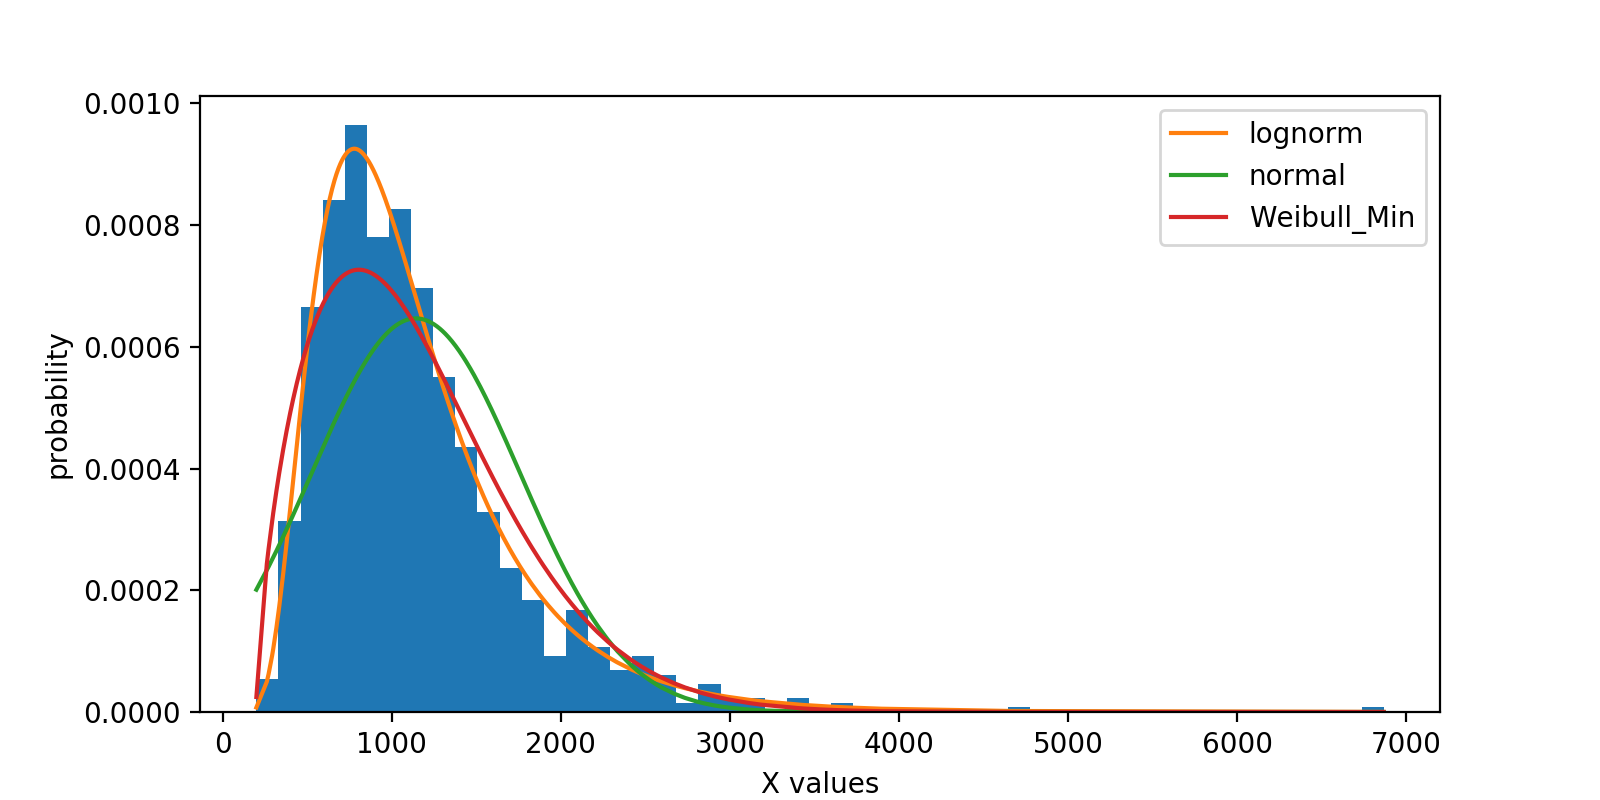

In [78]:
# visualize

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(data, bins='auto', density=True)
ax.plot(data, pdf_lognorm, label='lognorm')
ax.plot(data, pdf_norm, label='normal')
ax.plot(data, pdf_weibull_min, label='Weibull_Min')
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

<div class="alert alert-info">
    <h4>Notes</h4>
    <p>Visual inspection is one option to assess the performance of the fitted distributions. The other option is to use hypothesis testing with Q-Q plots to numerically assess the performance of the fitted distribution. For example, if you want to numerically assess how well your data matches Gaussian distribution, you can test your hypothesis through D'Agostino-Pearson normality test, Anderson-Darling Test, or Shapiro-Wilk Test. In this post, normality test through <code>scipy.stats.normaltest()</code> will be covered.</p>
</div>

### 2. Try non-parametric method

There are pros and cons for using non-parametric methods. The biggest pros is that it does not assume anything about the distribution. They are **distribution-free**. You do not need to know distribution shape, mean, standard devation, skewness, kurtosis, etc... All you need is just a set of sample data that is representative of a population. 

The fact that it does not assume anything about the distribution has another implication when you have small number of data - there's no need for Central Limit Theorem to be applied. Recall that the Central Limit Theorem states that the data will become more and more Gaussian-distributed as the number of samples increases. Techniques that assume normality of a distribution expect the sample data to follow Central Limit Theorem. Non-parametric methods improves the performance of statistical calculation when there are too few number of samples that the Central Limit Theorem can't be applied. However, it is important that those few samples are reasonably representative of the true population. If they are not, your result will be biased.

Non-parametric methods are geared toward hypothesis testing rather than estimation. Disadvantages of non-parametric methods include lack of power compared to more traditional approaches that require prior knowledge of a distribution. If you knew the distribution of your data with 100% certainty, there is no reason to use a non-parametric method.  Doing so would be a waste of perfectly good prior knowledge. 

Another disadvantage is that many non-parametric methods are computation intensive. For example, [Boostrapping](https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap) is a non-parametric alternative that requires numerical iterations to calculate confidence interval of statistics. On the other hand, if the assumption of normality holds valid for your data, you can directly compute the confidence interval by using a simple equation.

<div class="alert alert-info">
    <h4>Notes</h4>
    <p>Parametric methods are the type of methods that assume a certain shape of a distribution. For example, the following equation is used to calculate the confidence interval of a mean of a distribution:</p>
    <p><center style="margin-top: 20px">CI of mean = sample mean $\pm$ $($distribution score $\times$ Standard Error $)$</center></p>
    <p>The variable in the equation, <i>distribution score</i>, depends on the type of the distribution. If you do not know the distribution shape of your data, it is very difficult to obtain the value of the distribution score. On the other hand, non-parametric methods do not assume anything about a distribution. A non-parametric alternative to calculate confidencer interval of mean is to use <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap">Bootstrapping</a>.</p>
</div>

The following table lists non-parametric alternatives to techniques that assume normality of a distribution:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Techniques That Assume Normality</th>
         <th class="text-center">Non-Parametric Alternatives</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Confidence Interval with z-test</td>
         <td class="text-center">Bootstrapping</td>
      </tr>
      <tr>
         <td class="text-center">T-test</td>
         <td class="text-center">Mann-Whitney test; Mood's median test; Kruskal-Wallis test</td>
      </tr>       
      <tr>
         <td class="text-center">ANOVA</td>
         <td class="text-center">Mood's median test; Kruskal-Willis test</td>
      </tr>
      <tr>
         <td class="text-center">Paired t-test</td>
         <td class="text-center">One-sample sign test</td>
      </tr>
      <tr>
         <td class="text-center">F-test; Bartlett's test</td>
         <td class="text-center">Levene's test</td>
      </tr>
      <tr>
         <td class="text-center">Individuals control chart</td>
         <td class="text-center">Run Chart</td>
      </tr>
   </tbody>
</table>

### 3. Transform the data into normal distribution

The data is actually normally distributed, but it might need transformation to reveal its normality. For example, lognormal distribution becomes normal distribution after taking a log on it. The two plots below are plotted using the same data, just visualized in different x-axis scale. Observe how lognormal distribution looks normal when log is taken on the x-axis.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook

In [15]:
# sample data generation
np.random.seed(42)
data = sorted(stats.lognorm.rvs(s=0.5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.lognorm.fit(data, loc=0)
pdf_lognorm = stats.lognorm.pdf(data, shape, loc, scale)

<IPython.core.display.Javascript object>


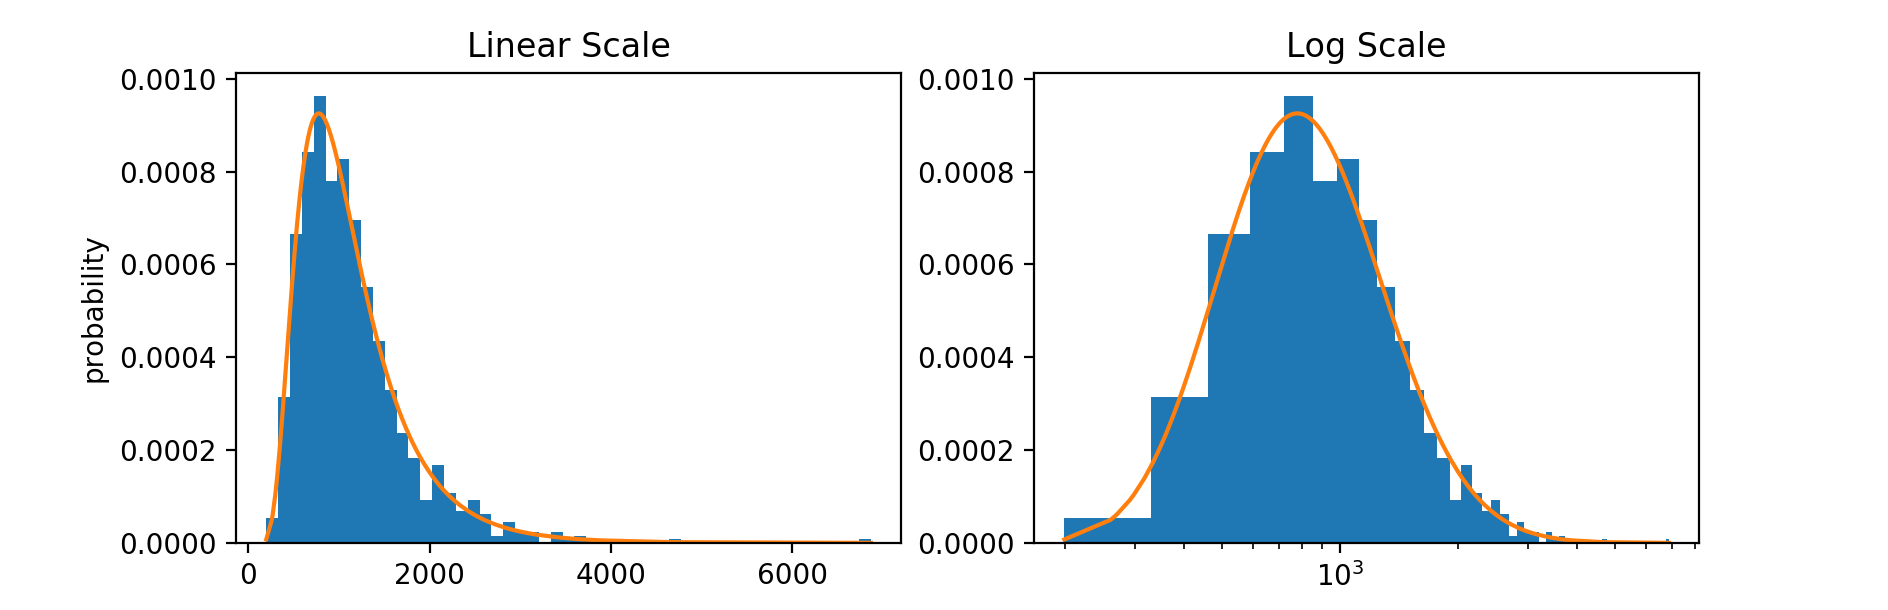

In [28]:
# visualize

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(data, bins='auto', density=True)
ax1.plot(data, pdf_lognorm)
ax1.set_ylabel('probability')
ax1.set_title('Linear Scale')

ax2.hist(data, bins='auto', density=True)
ax2.plot(data, pdf_lognorm)
ax2.set_xscale('log')
ax2.set_title('Log Scale');

Similar transformations can be done on the sample data to convert non-normal to normal distribution. Lognormal transformation is used convert rock permeability distributions to normal distribution, and square root transformation is used to analyze biological population growth, such as bacterial colonies per petri dish. These types of transformations - rescaling the distribution by taking exponents or log - are called Power Transformations. **Box-Cox** transformation is the most popular technique within the family of power transformations.

# Box-Cox Transformation: Theory

> **Box-Cox Transformation** is a type of power transformation to convert non-normal data to normal data by raising the distribution to a power of lambda ($\lambda$). The algorithm can automatically decide the lambda ($\lambda$) parameter that best transforms the distribution into normal distribution.

Box-Cox transformation is a statistical technique known to have remedial effects on highly skewed data. Essentially it's just raising the distribution to a power of lambda ($\lambda$) to transform non-normal distribution into normal distribution. The lambda ($\lambda$) parameter for Box-Cox has a range of *-5 < $\lambda$ < 5*. If the lambda ($\lambda$) parameter is determined to be 2, then the distribution will be raised to a power of 2 — $Y^2$. The exception to this rule is when the lambda ($\lambda$) parameter is 0 - log will be taken to the distribution — log($Y$).

The below table shows how Box-Cox transformation raises the power of a distribution to different lambda ($\lambda$) values:

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Lambda ($\lambda$)</th>
         <th class="text-center">Transformed Distribution ($Y^{'}$)</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">-2</td>
         <td class="text-center">$Y^{'} = \frac{1}{Y^2}$</td>
      </tr>
      <tr>
         <td class="text-center">-1</td>
         <td class="text-center">$Y^{'} = \frac{1}{Y^1}$</td>
      </tr>       
      <tr>
         <td class="text-center">-0.5</td>
         <td class="text-center">$Y^{'} = \frac{1}{sqrt(Y)}$</td>
      </tr>
      <tr>
         <td class="text-center">0</td>
         <td class="text-center">$Y^{'} = log(Y)$</td>
      </tr>
      <tr>
         <td class="text-center">0.5</td>
         <td class="text-center">$Y^{1} = sqrt(Y)$</td>
      </tr>
      <tr>
         <td class="text-center">1</td>
         <td class="text-center">$Y^{'} = Y$</td>
      </tr>
      <tr>
         <td class="text-center">2</td>
         <td class="text-center">$Y^{'} = Y^2$</td>
      </tr>       
   </tbody>
</table>

Although in the table lambda ($\lambda$) values of only *-2 < $\lambda$ < 2* were displayed, the actual algorithm has a range of *-5 < $\lambda$ < 5*. Also note that using a lambda ($\lambda$) value of 1 does not do anything to the distribution. If the Box-Cox algorithm spits out $\lambda = 1$, it probably means that your data is Gaussian-like or Gaussian enough to an extent that there is no need for transformation.

**All data to be positive and greater than 0 (Y > 0)**

Box-Cox transformation does not work if data is smaller than 0. This can easily be fixed by adding a constant ($C$) that will make all your data greater than zero. The transformation equation is then:

<p><center>$Y^{'} = (Y + C)^{\lambda}$</center></p>

**Python Code Implementation**

The code implementation for Box-Cox transformation is very simple with the help of [scipy.stats.boxcox()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).

<pre>
    <code class="language-python">
        from scipy import stats
        
        xt, lmbda = stats.boxcox(x)
    </code>
</pre>

<code>xt</code> is the transformed data, and <code>lmbda</code> is the lambda ($\lambda$) parameter. More detailed usage & analysis of Box-Cox will be covered in the next section.

# Box-Cox Transformation: Phone Call Duration - Gamma Distribution

The distribution for phone call duration follows Erlang distribution, a member of a family of Gamma distribution. When the shape parameter of Gamma distribution has an integer value, the distribution is the Erlang disribution. Since power transformation is known to work well with Gamma distribution, we can try Box-Cox transformation to turn non-normal data into normal data. The below code snippet demonstrates how a typical Gamma distribution looks like when plotted:

In [55]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [56]:
# random variable generation for gamma distribution

def generate_gamma_dist(shape):
    dist_gamma = sorted(stats.gamma.rvs(shape, loc=0, scale=1000, size=5000))
    shape, loc, scale = stats.gamma.fit(dist_gamma, loc=0)
    pdf_gamma = stats.gamma.pdf(dist_gamma, shape, loc, scale)
    return dist_gamma, pdf_gamma

<IPython.core.display.Javascript object>


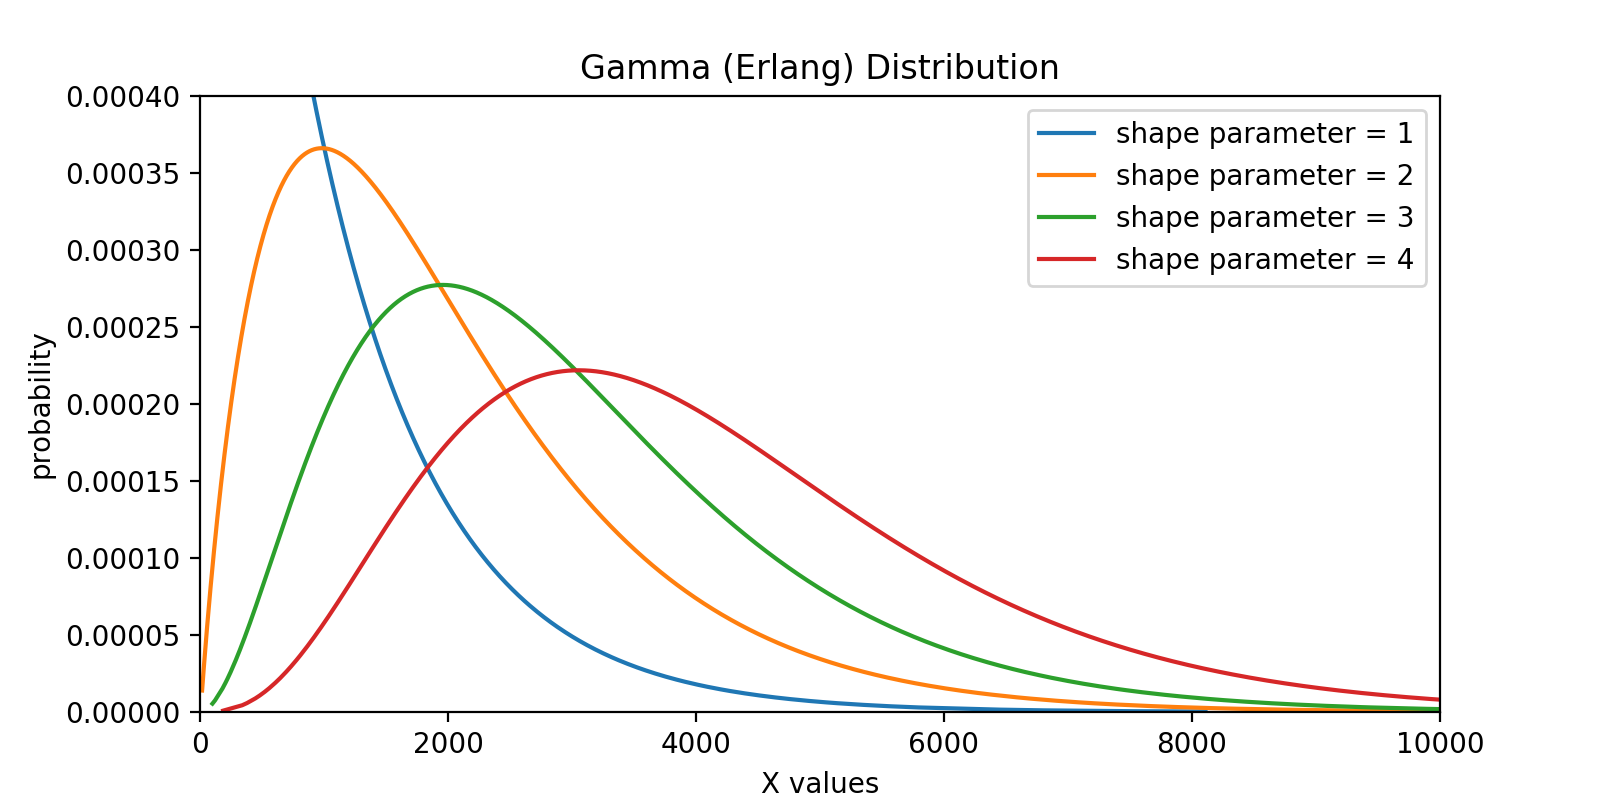

In [57]:
# visualize

fig, ax = plt.subplots(figsize=(8, 4))
for i in range(1, 5):
    x, y = generate_gamma_dist(i)
    ax.plot(x, y, label='shape parameter = %s' % i)
    
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.set_ylim(0, 0.0004)
ax.set_xlim(0, 10000)
ax.set_title('Gamma (Erlang) Distribution')
ax.legend();

## 1. Data Preparation

### 1.1. Sample Data Description

We will use phone calls data from [Enigma Public](https://public.enigma.com/datasets/nrc-event-reporting-calls-2010/b1a39934-514e-4c8e-b82d-5d2a013dc648). Enigma Public is a website that processes & hosts various public data and allows people to obtain them through file downloads or API access. The sample data originally comes from the [National Response Center](http://www.nrc.uscg.mil/) (NRC). They receive phone calls from anyone witnessing an oil spill, chemical release or maritime security incident and record that data.


For your convenience, I already downloaded the sample data and hosted it on this website. You can access the sample data directly by importing the file through <code>requests</code>.

In [11]:
import requests
import io
import pandas as pd

In [12]:
base_url = 'https://aegis4048.github.io/downloads/notebooks/sample_data/'
filename = '08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'

data = requests.get(base_url + filename).content
df   = pd.read_csv(io.StringIO(data.decode('utf-8')))
df.head()

,seqnos,date_time_received,date_time_complete,calltype,responsible_company,responsible_org_type,responsible_city,responsible_state,responsible_zip,source,serialid
0,946479,2010-07-03T21:11:31+00:00,2010-07-03T21:19:57+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15900
1,946480,2010-07-03T20:59:29+00:00,2010-07-03T21:16:22+00:00,INC,CHEVRON,PRIVATE ENTERPRISE,NaN,HI,NaN,WEB REPORT,15901
2,946481,2010-07-03T21:42:43+00:00,2010-07-03T21:53:07+00:00,INC,BP,PRIVATE ENTERPRISE,NaN,LA,NaN,TELEPHONE,15902
3,946482,2010-07-03T22:22:41+00:00,2010-07-03T22:34:07+00:00,INC,CHEVRON,PRIVATE ENTERPRISE,SAN LUIS OBISPO,CA,93401,TELEPHONE,15903
4,946483,2010-07-03T22:46:13+00:00,2010-07-03T22:50:24+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15904


### 1.2. Sample Data Processing

Since we are interested in the time ellapsed for each phone call, the primary columns of our interest are <code>date_time_received</code> and <code>date_time_complete</code>. However, the raw data is not in a numerical format that can be directly plotted on histogram; we will need to parse & process the time data. I chose <code>.iloc[11000: 12000, :]</code> because it would take too long time to process all ~30,000 rows of the original data. The data is then sorted by the timestamp column. 

**Process DateTime**

In [136]:
import datetime

In [43]:
def process_time(row):
    
    call_received = datetime.datetime.strptime(row['date_time_received'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    call_ended    = datetime.datetime.strptime(row['date_time_complete'].split('+')[0], '%Y-%m-%dT%H:%M:%S')
    
    time_ellapsed = call_ended - call_received

    row['Parsed Call Received'] = str(call_received)
    row['Parsed Call Ended'] = str(call_ended)
    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)

    return row

In [49]:
# df was defined above

parsed_df = df.iloc[11000: 12000, :].apply(process_time, axis=1).iloc[:, -4:]
parsed_df['Parsed Call Received'] = pd.to_datetime(parsed_df['Parsed Call Received'], format='%Y-%m-%d %H:%M:%S')
parsed_df['Parsed Call Ended'] = pd.to_datetime(parsed_df['Parsed Call Ended'], format='%Y-%m-%d %H:%M:%S')
parsed_df = parsed_df.sort_values(by = 'Parsed Call Received')
parsed_df.head()

,Parsed Call Received,Parsed Call Ended,Time Ellapsed,Time Ellapsed (minutes)
11000,2010-05-21 19:32:09,2010-05-21 19:43:35,0:11:26,11.4
11001,2010-05-21 19:54:40,2010-05-21 19:58:40,0:04:00,4.0
11002,2010-05-21 20:03:14,2010-05-21 20:09:11,0:05:57,6.0
11003,2010-05-21 20:04:26,2010-05-21 20:07:39,0:03:13,3.2
11004,2010-05-21 20:18:38,2010-05-21 20:27:45,0:09:07,9.1


**Drop Duplicate Rows**

The original data does not record the time to a precision of microseconds (<code>2010-07-03T21:11:31+00:00</code>). Due to the imprecision of the recorded data, there will be rows with duplicate <code>date_time_received</code> and <code>date_time_complete</code>. The data itself is not duplicate, but the data in datetime column is duplicate. Leaving them as they are and plotting them might mess up your plots. 

Observe the change in the row number of the data frame. It's the indication that there are two rows with the same <code>date_time_received</code> values.

In [105]:
parsed_df.shape

(1000, 4)

In [106]:
new_parsed_df = parsed_df.drop_duplicates(subset=['Parsed Call Received'], keep=False)
new_parsed_df.shape

(998, 4)

## 2. Transformatoin

### 2.1. Sample Data Histogram

It can be observed that the phone call duration data indeed does not follow normal distribution.

In [128]:
time_duration_orig = new_parsed_df['Time Ellapsed (minutes)'].values

<IPython.core.display.Javascript object>


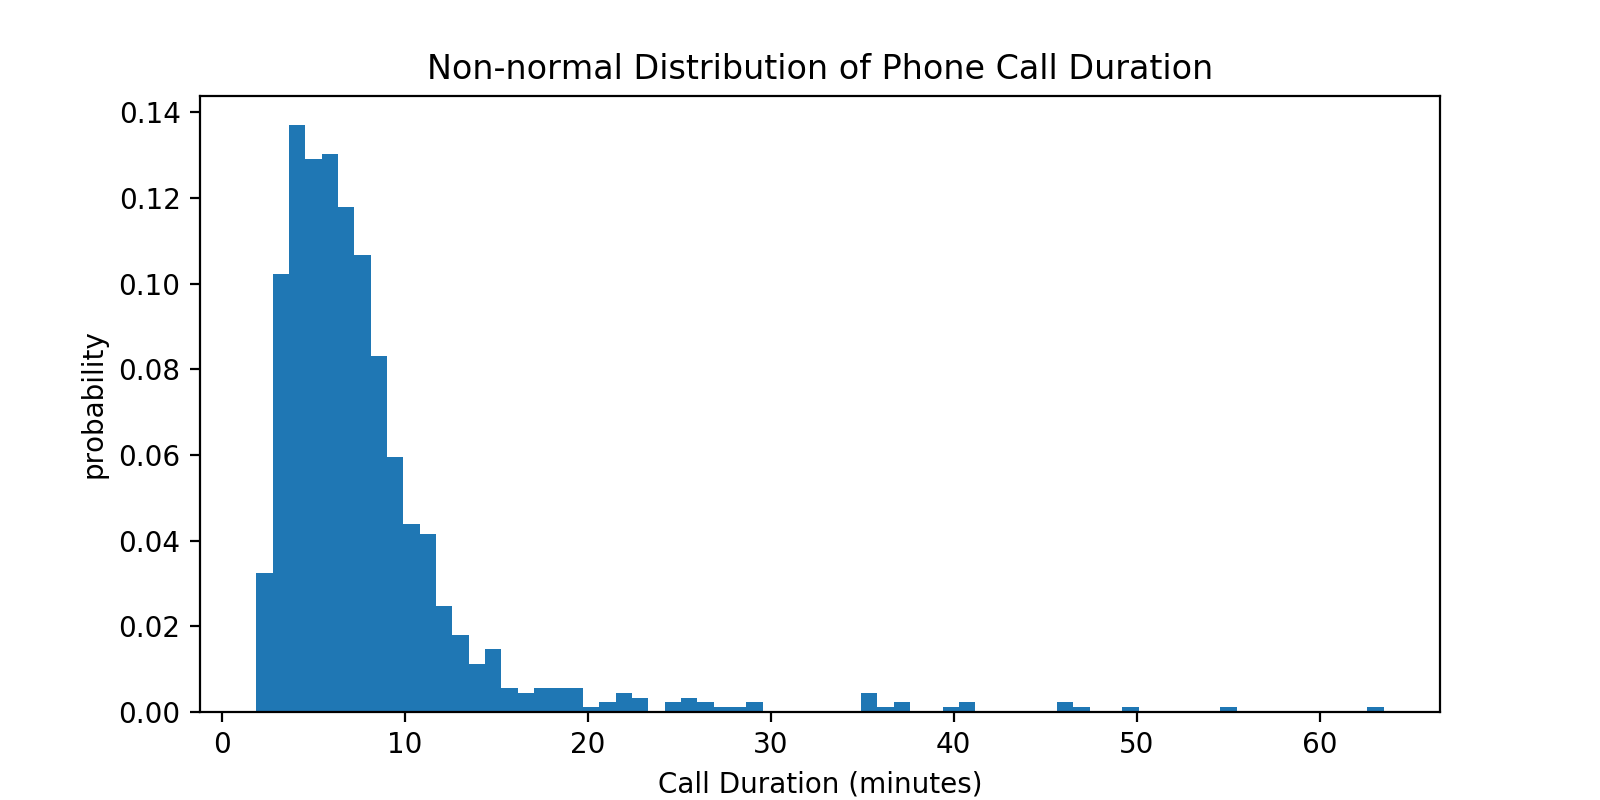

In [130]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(time_duration_orig, bins='auto', density=True)
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution of Phone Call Duration');

### 2.2. Box-Cox Transformation

The Python code implementation for Box-Cox is actually very simple. The below one-line code is it for transformation. More information about the Box-Cox function can be found in the [scipy documentaion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).

In [132]:
time_duration_trans, lmbda = stats.boxcox(time_duration)

How does Box-Cox determine the best transformation parameter to obtain a distribution that is close to normal? It calculates correlation coefficient for different lambda ($\lambda$) values, and finds the one that maximizes the correlation coefficient. In our case, we find that the best lambda parameter is  $\lambda = 0.322$

Best lambda parameter = -0.322


<IPython.core.display.Javascript object>


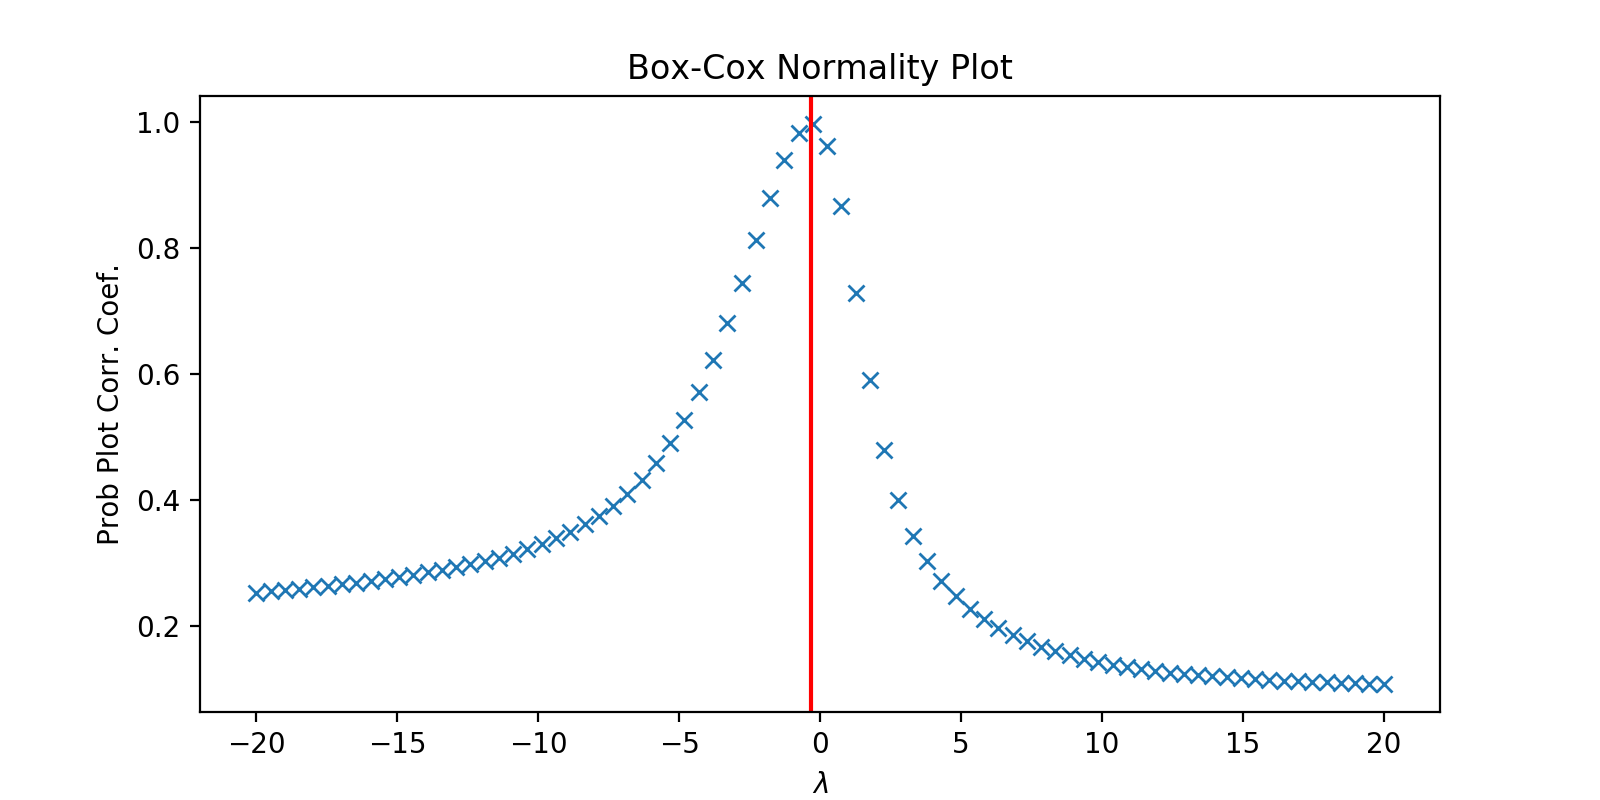

In [133]:
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(time_duration_orig, -20, 20, plot=ax)
ax.axvline(lambda_value, color='r');





### 2.3. Visual Inspection

One can visually inspect how good the transformation was by fitting a Gaussian distribution function.

In [134]:
# fit Gaussian distribution

time_duration_trans.sort()
mean, std = stats.norm.fit(time_duration_trans, loc=0)
pdf_norm = stats.norm.pdf(time_duration_trans, mean, std)

<IPython.core.display.Javascript object>


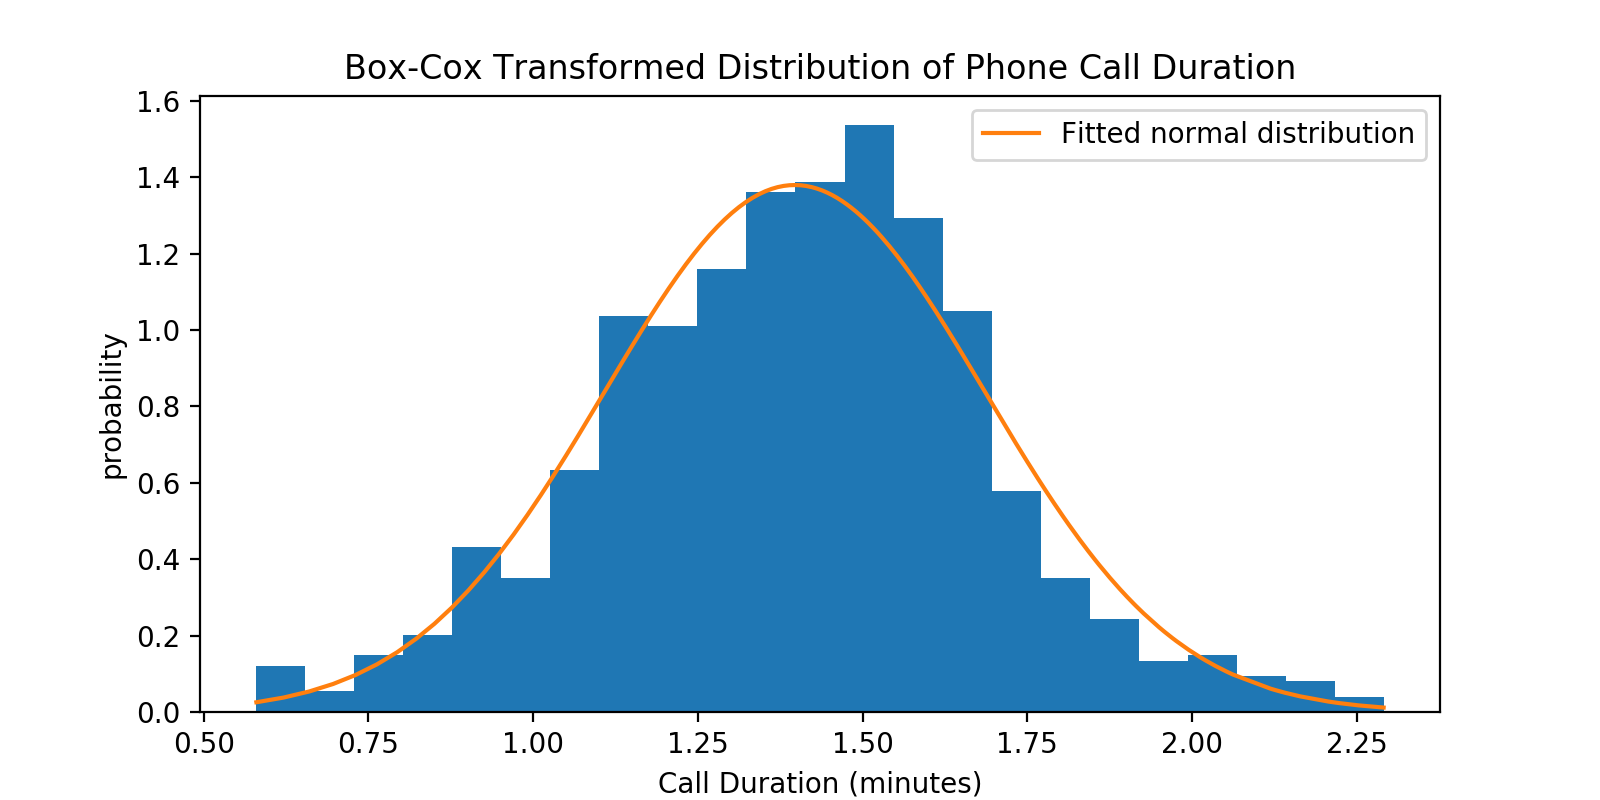

In [135]:
# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(time_duration_trans, bins='auto', density=True)
ax.plot(time_duration_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('probability')
ax.set_title('Box-Cox Transformed Distribution of Phone Call Duration')
ax.legend();

Visual inspection can be done in a different way with Q-Q plots. The red straight line is the fitted theoretical Gaussian distribution function. If the scatter plot is closer to the red straight line, it means that the data is very close to Gaussian distribution. Deviation from the red straight line means the opposite.

Recall that <code>time_duration_orig</code> is the original sample data, and <code>time_duration_trans</code> is the Box-Cox transformed data.

<IPython.core.display.Javascript object>


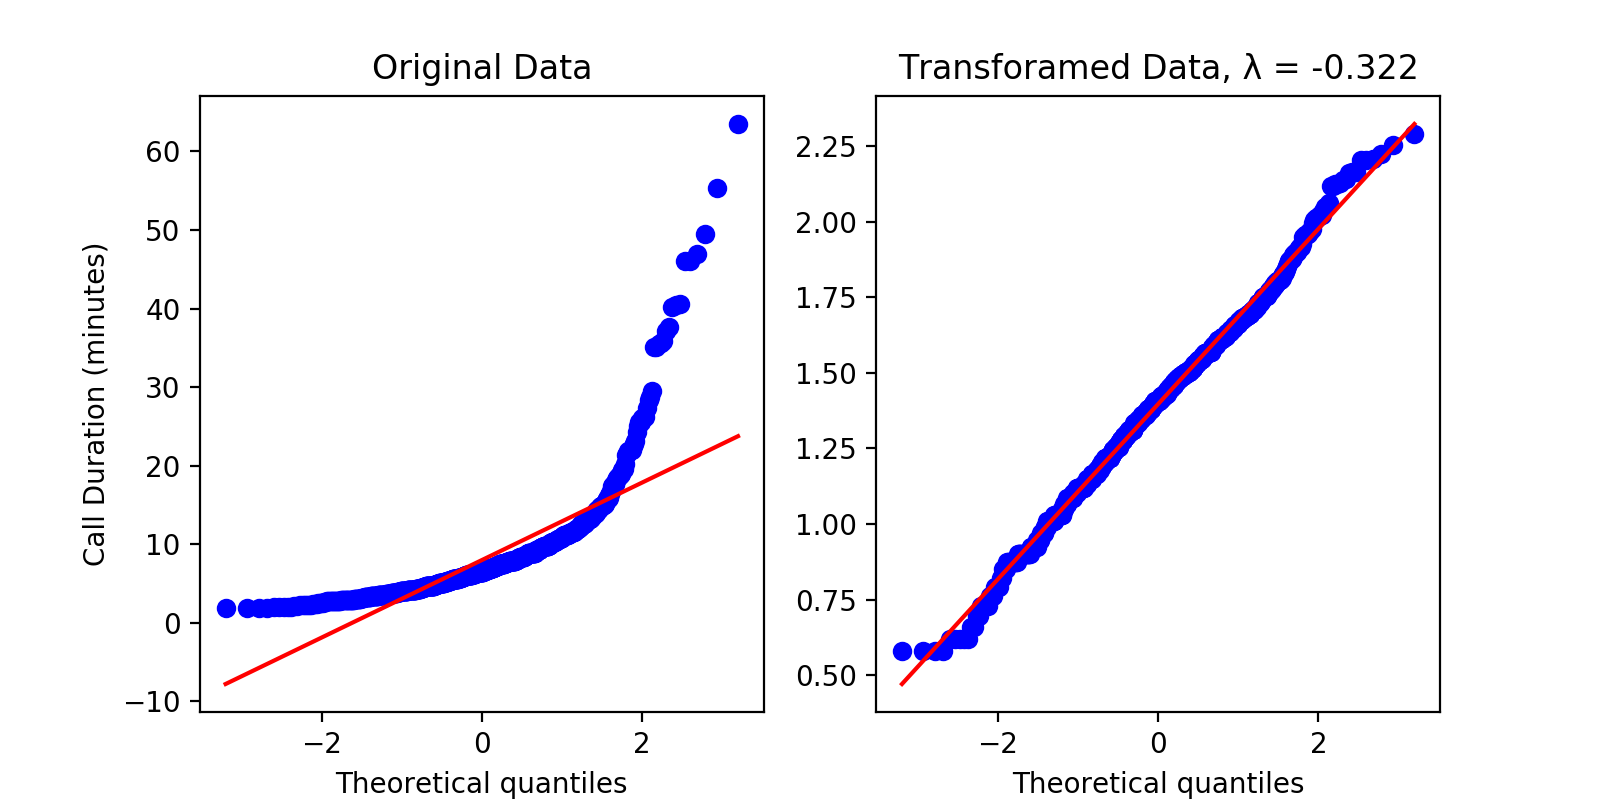

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = stats.probplot(time_duration_orig, dist=stats.norm, plot=ax1)
prob = stats.probplot(time_duration_trans, dist=stats.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Call Duration (minutes)')
ax2.set_title('Transforamed Data, λ = %s' % -0.322);
ax2.set_ylabel('');

### 2.4. Hypothesis Testing with Normality Test

<IPython.core.display.Javascript object>


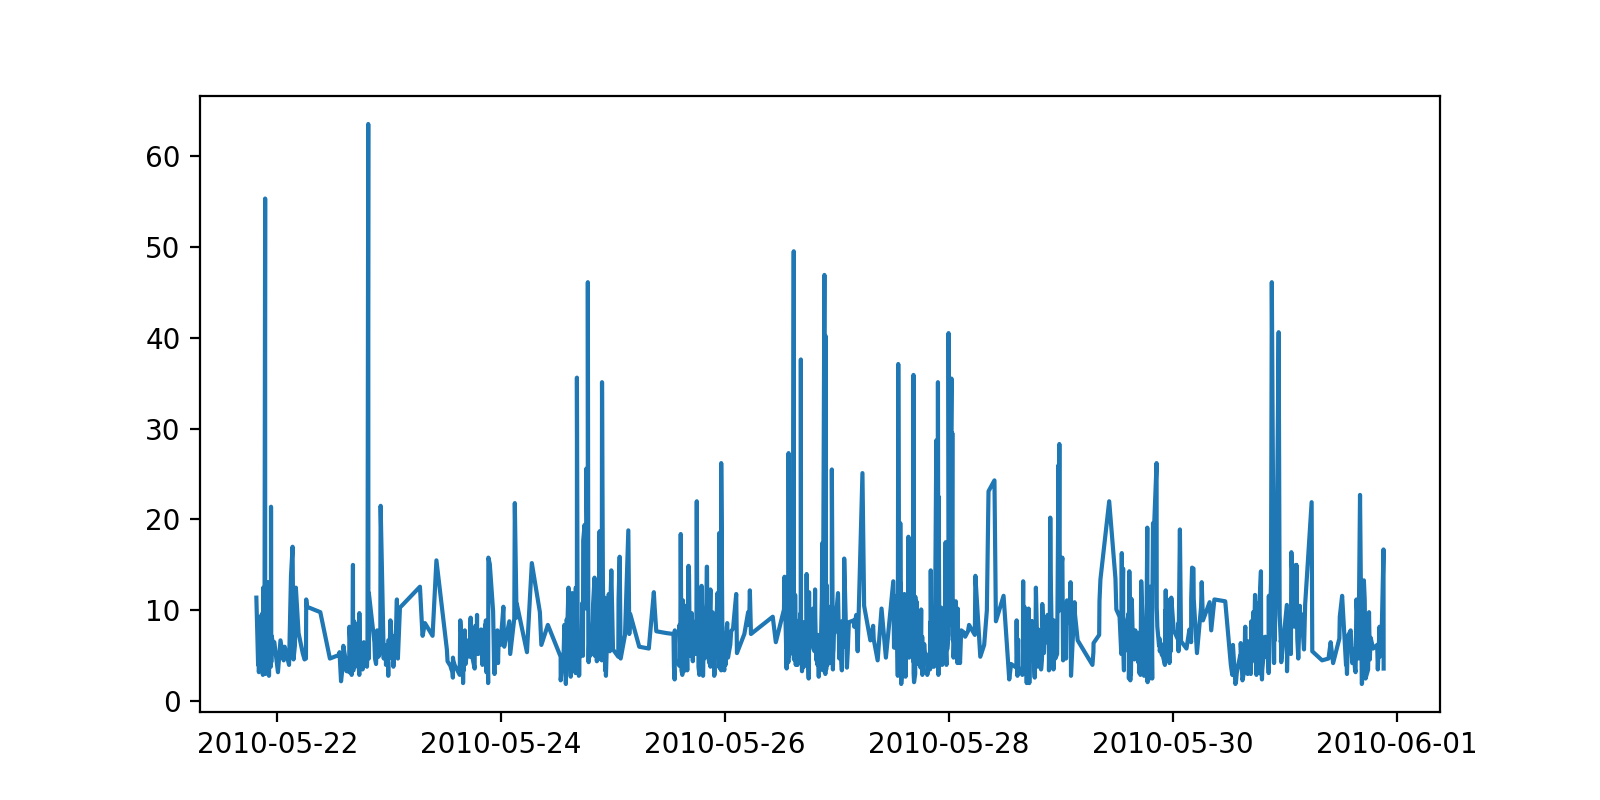

In [58]:
#new_parsed_df = parsed_df.drop_duplicates(subset=['Parsed Call Received'], keep=False)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(new_parsed_df['Parsed Call Received'],new_parsed_df['Time Ellapsed (minutes)'])


<IPython.core.display.Javascript object>


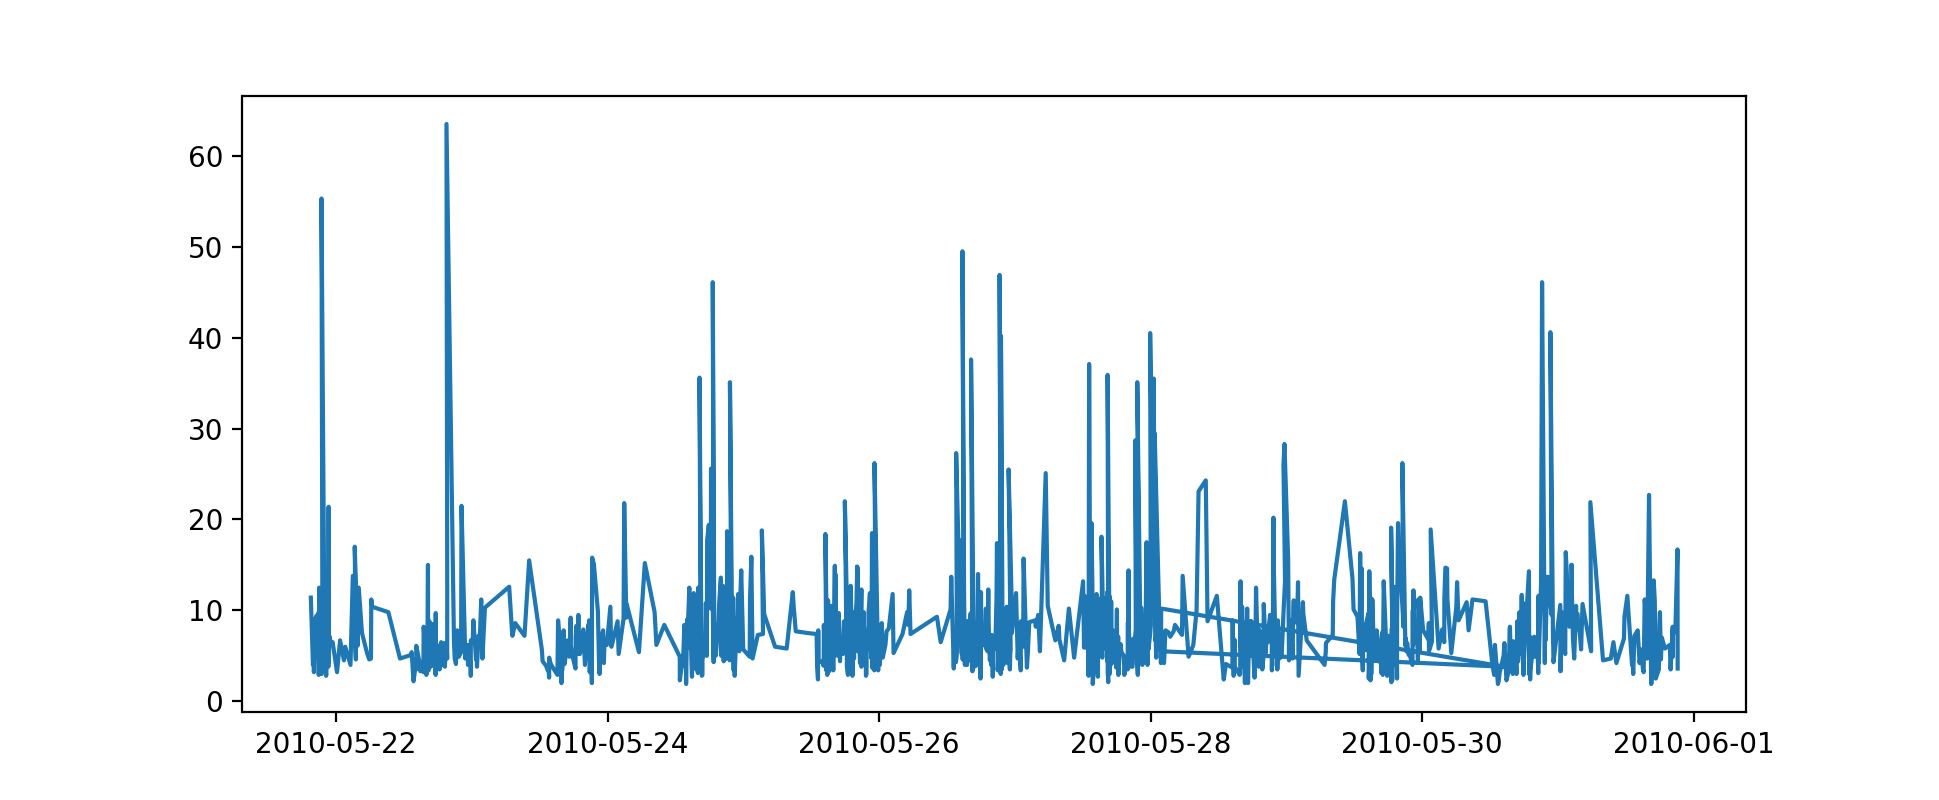

In [75]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(new_parsed_df['Parsed Call Received'], new_parsed_df['Time Ellapsed (minutes)'])

In [76]:
new_parsed_df['Parsed Call Received'].shape

(998,)

In [67]:
parsed_df.shape

(1000, 4)

In [26]:
a = pd.DataFrame([['2010-05-21 19:32:09', 1], ['2010-05-21 19:32:09', 2]])
a.columns=['aa', 'bb']

b = a.drop_duplicates(subset=['aa'], keep=False)
b

,aa,bb


In [17]:
new_parsed_df = parsed_df.drop_duplicates(subset=['Parsed Call Received'], keep=False)
new_parsed_df.head()

,Parsed Call Received,Parsed Call Ended,Time Ellapsed,Time Ellapsed (minutes)
11000,2010-05-21 19:32:09,2010-05-21 19:43:35,0:11:26,11.4
11001,2010-05-21 19:54:40,2010-05-21 19:58:40,0:04:00,4.0
11002,2010-05-21 20:03:14,2010-05-21 20:09:11,0:05:57,6.0
11003,2010-05-21 20:04:26,2010-05-21 20:07:39,0:03:13,3.2
11004,2010-05-21 20:18:38,2010-05-21 20:27:45,0:09:07,9.1


In [74]:
new_parsed_df.shape

(998, 4)

## 1.3. Sample Data Histogram

It can be observed that the phone call duration data does not follow normal distribution.

In [128]:
time_duration = parsed_df['Time Ellapsed (minutes)'].values

<IPython.core.display.Javascript object>


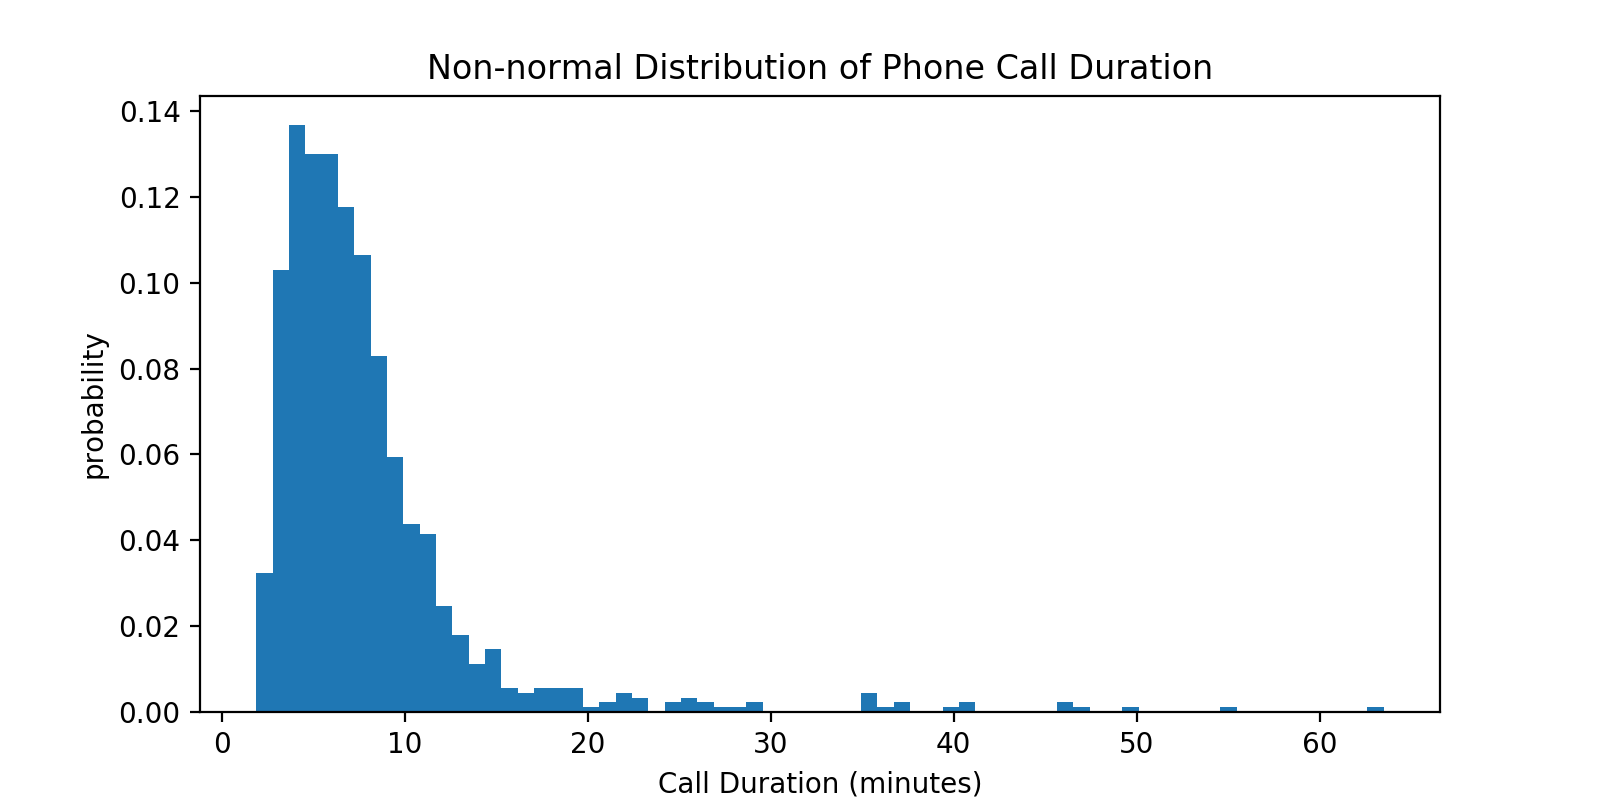

In [129]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(time_duration, bins='auto', density=True)
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution of Phone Call Duration');

## 1.4. Sample Control Chart

In [ ]:
COUNT = 0

def process_time(row):
    
    call_received = ' '.join(row['date_time_received'].split('T')).split('+')[0]
    call_ended    = ' '.join(row['date_time_complete'].split('T')).split('+')[0]
    
    call_received = datetime.datetime.strptime(call_received, '%Y-%m-%d %H:%M:%S.%f')
    call_ended    = datetime.datetime.strptime(call_ended, '%Y-%m-%d %H:%M:%S.%f')
    
    time_ellapsed = call_ended - call_received

    row['Parsed Call Received'] = str(call_received)
    row['Parsed Call Ended'] = str(call_ended)
    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)
    
    # row['new'] =  pd.to_datetime(raw_data['Parsed Call Received'], format='%d%b%Y:%H:%M:%S.%f')
    
    return row

In [37]:
# sample data generation
np.random.seed(42)
data = sorted(stats.gamma.rvs(5, loc=1, scale=1000, size=1000))

# fit lognormal distribution
shape, loc, scale = stats.gamma.fit(data, loc=0)
pdf_gamma = stats.gamma.pdf(data, shape, loc, scale)

plt.plot(data, pdf_gamma, label='lognorm')

<IPython.core.display.Javascript object>


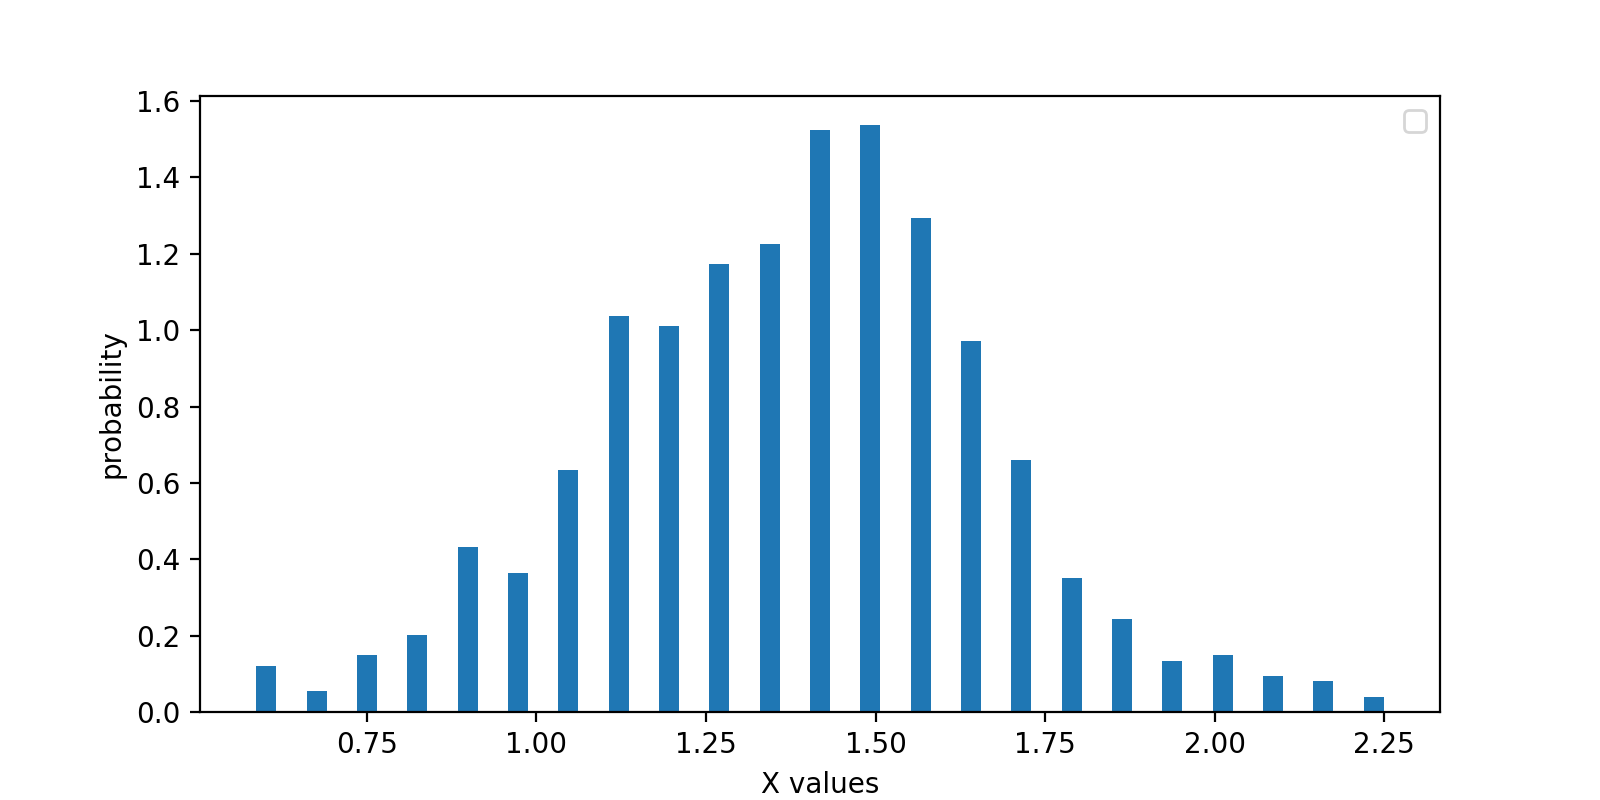

C:\Users\EricKim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
No handles with labels found to put in legend.


In [17]:
trans = stats.boxcox(temp)

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(trans, bins='auto', density=True)
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

In [138]:
import pandas as pd
import datetime
import re

file = 'sample_data/08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'

df = pd.read_csv(file)[['date_time_received', 'date_time_complete']]

In [143]:
def process_time(row):
    
    call_received = ' '.join(row['date_time_received'].split('T')).split('+')[0]
    call_ended    = ' '.join(row['date_time_complete'].split('T')).split('+')[0]
    
    call_received = datetime.datetime.strptime(call_received, '%Y-%m-%d %H:%M:%S')
    call_ended    = datetime.datetime.strptime(call_ended, '%Y-%m-%d %H:%M:%S')
    
    time_ellapsed = call_ended - call_received

    row['Parsed Call Received'] = str(call_received)
    row['Parsed Call Ended'] = str(call_ended)
    row['Time Ellapsed'] = str(time_ellapsed)
    row['Time Ellapsed (minutes)'] = round(time_ellapsed.total_seconds() / 60, 1)
    
    return row

parsed_df = df.iloc[11000: 12000, :].apply(process_time, axis=1).iloc[:, 2:]

In [144]:
parsed_df.head()

,Parsed Call Received,Parsed Call Ended,Time Ellapsed,Time Ellapsed (minutes)
11000,2010-05-21 19:32:09,2010-05-21 19:43:35,0:11:26,11.4
11001,2010-05-21 19:54:40,2010-05-21 19:58:40,0:04:00,4.0
11002,2010-05-21 20:03:14,2010-05-21 20:09:11,0:05:57,6.0
11003,2010-05-21 20:04:26,2010-05-21 20:07:39,0:03:13,3.2
11004,2010-05-21 20:18:38,2010-05-21 20:27:45,0:09:07,9.1


In [136]:
type(parsed_df['Parsed Date Time'].iloc[0])

numpy.int64

<IPython.core.display.Javascript object>


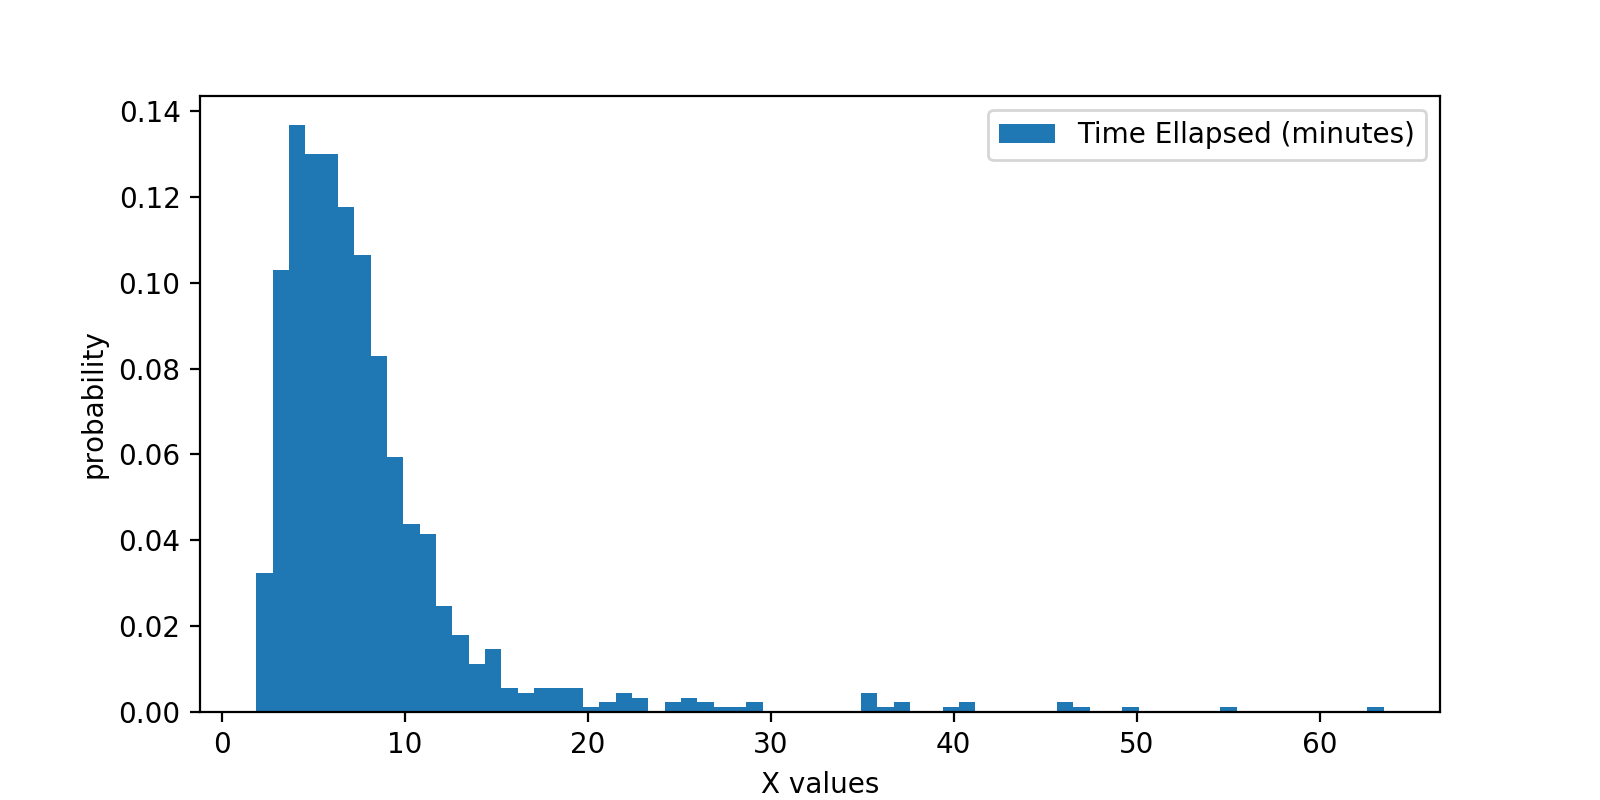

In [15]:
temp = parsed_df['Time Ellapsed (minutes)']

# visualize

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(temp, bins='auto', density=True)
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

In [99]:
import urllib.request
import io

base_url = 'https://aegis4048.github.io/downloads/notebooks/sample_data/'
filename = '08c32c03-9d88-42a9-b8a1-f493a644b919_NRCEventReporting-Calls-2010.csv'

s=requests.get(base_url + filename).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [100]:
c

,seqnos,date_time_received,date_time_complete,calltype,responsible_company,responsible_org_type,responsible_city,responsible_state,responsible_zip,source,serialid
0,946479,2010-07-03T21:11:31+00:00,2010-07-03T21:19:57+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15900
1,946480,2010-07-03T20:59:29+00:00,2010-07-03T21:16:22+00:00,INC,CHEVRON,PRIVATE ENTERPRISE,NaN,HI,NaN,WEB REPORT,15901
2,946481,2010-07-03T21:42:43+00:00,2010-07-03T21:53:07+00:00,INC,BP,PRIVATE ENTERPRISE,NaN,LA,NaN,TELEPHONE,15902
3,946482,2010-07-03T22:22:41+00:00,2010-07-03T22:34:07+00:00,INC,CHEVRON,PRIVATE ENTERPRISE,SAN LUIS OBISPO,CA,93401,TELEPHONE,15903
4,946483,2010-07-03T22:46:13+00:00,2010-07-03T22:50:24+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15904
5,946484,2010-07-03T23:05:36+00:00,2010-07-03T23:12:37+00:00,INC,VERSATOLD,PRIVATE ENTERPRISE,VERNON,CA,90058,TELEPHONE,15905
6,946485,2010-07-03T23:12:16+00:00,2010-07-03T23:16:36+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15906
7,946486,2010-07-03T23:18:27+00:00,2010-07-03T23:26:43+00:00,INC,NaN,PRIVATE CITIZEN,NaN,TX,NaN,TELEPHONE,15907
8,946487,2010-07-03T23:39:35+00:00,2010-07-03T23:48:08+00:00,INC,ANADARKO PETROLEUM CORP.,PRIVATE ENTERPRISE,MIDWEST,WY,82643,TELEPHONE,15908
9,946488,2010-07-03T23:39:56+00:00,2010-07-03T23:45:46+00:00,INC,NaN,UNKNOWN,NaN,XX,NaN,TELEPHONE,15909
